In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: make plots look nicer
plt.rcParams['figure.figsize'] = (10, 6)

# Load your file
file_path = "toc_outcomes_2023_24_mrn_fin_caseid_merged.csv"
df = pd.read_csv(file_path)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.


In [2]:
# Check basic info
print(df.shape)
df.head()

# Column names
print(df.columns.tolist())

# Basic info (data types, nulls)
df.info()

# Summary statistics for numeric columns
df.describe()

# Summary statistics for categorical columns
df.describe(include='object')

(10386, 9)
['mrn', 'fin', 'caseid', 'admitdatetime', 'keck_los', 'inpt_mortality', 'dischargedisposition_group', 'readm_30d_count_gt_0', 'readm_90d_count_gt_0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10386 entries, 0 to 10385
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mrn                         10386 non-null  int64  
 1   fin                         2936 non-null   float64
 2   caseid                      2936 non-null   object 
 3   admitdatetime               10386 non-null  object 
 4   keck_los                    10386 non-null  int64  
 5   inpt_mortality              10386 non-null  int64  
 6   dischargedisposition_group  10341 non-null  object 
 7   readm_30d_count_gt_0        10386 non-null  int64  
 8   readm_90d_count_gt_0        10386 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 730.4+ KB


,caseid,admitdatetime,dischargedisposition_group
count,2936,10386,10341
unique,2936,10331,13
top,500Ns00000MZoIDIA1,2023-12-14 20:15:00,Home/Self Care
freq,1,2,4106


In [3]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_summary / len(df)) * 100

missing_df = pd.DataFrame({'Missing Count': missing_summary, 'Missing %': missing_percent})
missing_df.head(20)  # View top 20

,Missing Count,Missing %
fin,7450,71.731177
caseid,7450,71.731177
dischargedisposition_group,45,0.433276
mrn,0,0.000000
admitdatetime,0,0.000000
keck_los,0,0.000000
inpt_mortality,0,0.000000
readm_30d_count_gt_0,0,0.000000
readm_90d_count_gt_0,0,0.000000


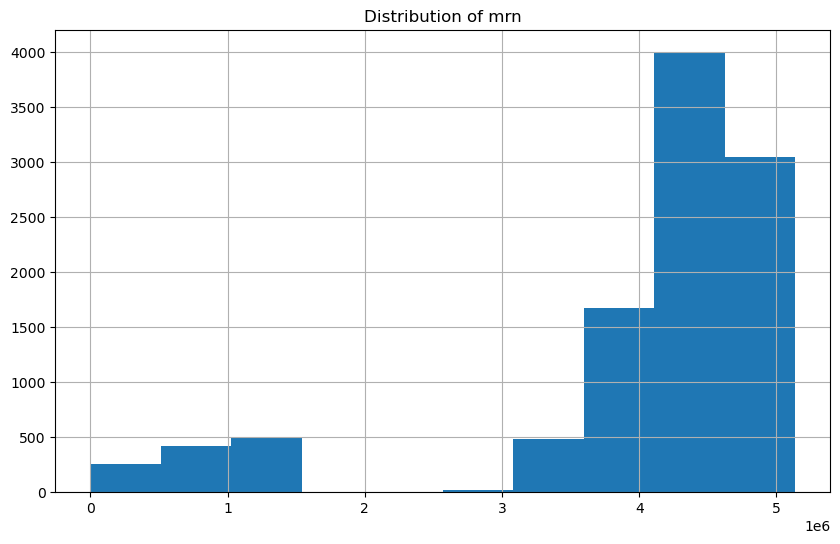

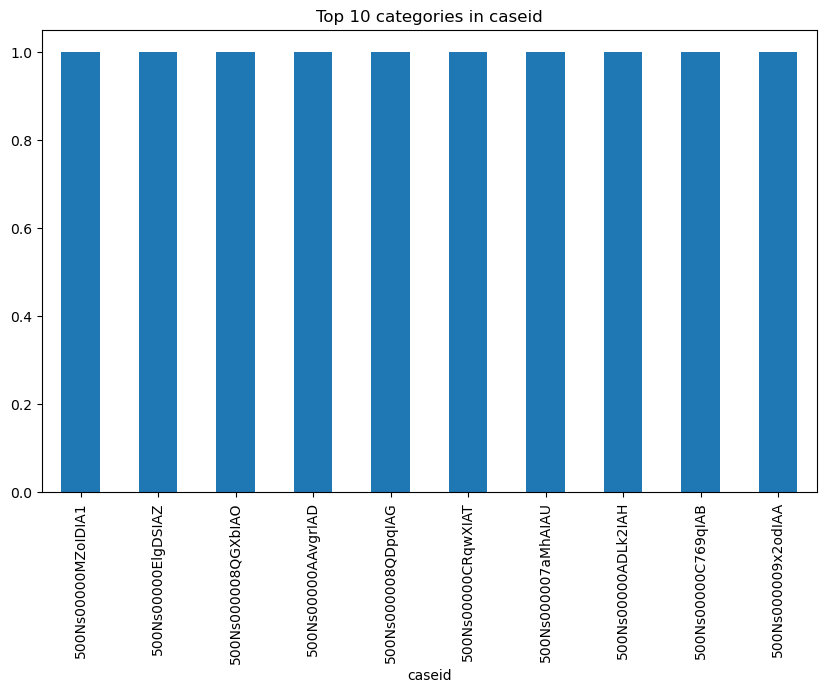

In [4]:
# Example for a numeric column
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if numeric_cols:
    df[numeric_cols[0]].hist()
    plt.title(f"Distribution of {numeric_cols[0]}")
    plt.show()

# Example for a categorical column
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
if categorical_cols:
    df[categorical_cols[0]].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 categories in {categorical_cols[0]}")
    plt.show()

In [ ]:
# check text